In [2]:
from cmlreaders import CMLReader, get_data_index
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sb
import scipy
from scipy import stats
import pandas_to_pybeh as pb
from tqdm import tqdm_notebook as tn

In [3]:
BAI_high = 15
BAI_low = 8
BDI_high = 16
BDI_low = 10

sel_sub = pd.DataFrame([])
master = pd.read_excel(r'./220302_all_neuropsych.xlsx',engine="openpyxl") #read master spreadsheet of all RAM subjects demo/neuropsych data

sub_mat=list(np.zeros(len(master))*np.nan )
df = get_data_index('r1')

for sub in df['subject'].unique():
    num = int(sub[2:5])
    for i in master.index:
        sel = master.iloc[i]['Subject Number']
        if sel == num:
            sub_mat[i]=sub

master['subject']=sub_mat
master = master.dropna(subset=['BAI','BDI'])

In [4]:
df = get_data_index('r1')
events = []
list_df = pd.DataFrame([])

experiments = ['FR1']
lag_crp = []
for sub in master['subject']:
    try:
        for exp in experiments:
            localizations=df[(df['subject']==sub) & (df['experiment']==exp)]['localization'].unique()        

            for loc in localizations:
                montages = df[(df['subject']==sub) & (df['experiment']==exp) & (df['localization']==loc)]['montage'].unique()            

                for mont in montages: # iterate over montages            
                    data = df[np.logical_and(df["subject"] == sub, df['experiment']==exp)]
                    sessions=data[np.logical_and(data['montage']==mont,data['localization']==loc)]['session'].unique()

                    for sess in sessions: 
                        reader = CMLReader(sub, exp, sess, montage=mont, localization=loc)   #reader for loading CML data
                        evs = reader.load('task_events')
#                         word_evs = evs[evs['type']=='REC_WORD']
                        events.append(evs)
                        
    except:
        print("failed for sub"+sub)

In [5]:
evs_df = pd.concat(events, ignore_index=True)
evs_df[:50]

eegoffset                    eegfile exp_version experiment  intrusion  \
0      282349  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
1      314149  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
2      319363  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
3      321225  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
4      322476  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
5      323675  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
6      324867  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
7      326059  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
8      327285  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
9      328551  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
10     329852  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
11     331077  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
12     332377  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
13     333627  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
14     334827  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
15     335636  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
16     352621  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
17     352939  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
18     368195  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
19     382450  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
20     382450  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
21     387664  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
22     387667  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
23     388959  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
24     390268  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
25     391560  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
26     392785  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
27     394019  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
28     395285  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
29     396544  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
30     397769  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
31     399036  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
32     400236  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
33     401503  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
34     402795  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
35     403603  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
36     416713  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
37     417238  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
38     424906  R1001P_FR1_0_12Oct14_1034        1.02        FR1         -1   
39     425868  R1001P_FR1_0_12Oct14_1034        1.02        FR1         -1   
40     426578  R1001P_FR1_0_12Oct14_1034        1.02        FR1         -1   
41     430569  R1001P_FR1_0_12Oct14_1034        1.02        FR1         -1   
42     431396  R1001P_FR1_0_12Oct14_1034        1.02        FR1         -1   
43     432243  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
44     436441  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
45     436441  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
46     441654  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
47     441658  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
48     442883  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   
49     444183  R1001P_FR1_0_12Oct14_1034        1.02        FR1       -999   

    is_stim item_name  it

In [19]:
## Terciles for high/low BAI and BDI subsets
# BAI = []
# BDI = []
# for sub in master['subject'].unique():
#     sub_row = master[master['subject']==sub]
#     BAI.append(int(sub_row['BAI'].item))
#     BDI.append(int(sub_row['BDI'].item))

# BAI_low = np.quantile(BAI, float(1/3))
# BAI_high = np.quantile(BAI, float(2/3))
# BDI_low = np.quantile(BDI, float(1/3))
# BDI_high = np.quantile(BDI, float(2/3))

BAI_low = 5
BAI_high = 13
BDI_low = 5
BDI_high = 13

In [54]:
lowA_crp = []
highA_crp = []
lowD_crp = []
highD_crp = []
evs_df = evs_df[(evs_df.subject != 'R1001P') & (evs_df.list >= 0)]
# evs_df.groupby(['subject']).apply(lambda x: pb.pd_crp(x, itemno_column='item_num', list_index=['subject', 'session', 'list'], lag_num=6, ))
# sub_crp = pb.pd_crp(evs_df[evs_df['subject']=='R1002P'], itemno_column='item_num', list_index=['subject', 'session', 'list'], lag_num=6)

##Split data by BAI terciles
for sub in evs_df['subject'].unique():
    try: 
        sub_df = evs_df[evs_df['subject']==sub]
        lag = pb.pd_crp(sub_df, itemno_column='item_num', list_index=['subject', 'session', 'list'], lag_num=6)
        if master[master['subject']==sub].iloc[0]['BAI']<=BAI_low:
            lowA_crp.append(lag)
        elif master[master['subject']==sub].iloc[0]['BAI']>=BAI_high:
            highA_crp.append(lag)
        if master[master['subject']==sub].iloc[0]['BDI']<=BDI_low:
            lowD_crp.append(lag)
        elif master[master['subject']==sub].iloc[0]['BDI']>=BDI_high:
            highD_crp.append(lag)
    except:
        print("Failed for subject "+sub)
        continue

lowA_df = pd.concat(lowA_crp)
highA_df = pd.concat(highA_crp)
lowD_df = pd.concat(lowD_crp)
highD_df = pd.concat(highD_crp)

/home1/evsnyder/.conda/envs/cmlreader0/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home1/evsnyder/analysis/mental_health/Mental_health/pandas_to_pybeh.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evs['pos'] = evs.groupby(list_index).cumcount()


Failed for subject R1006P
Failed for subject R1010J
Failed for subject R1018P
Failed for subject R1023J
Failed for subject R1032D
Failed for subject R1033D
Failed for subject R1044J
Failed for subject R1049J
Failed for subject R1054J
Failed for subject R1059J
Failed for subject R1062J
Failed for subject R1065J
Failed for subject R1066P
Failed for subject R1067P
Failed for subject R1080E
Failed for subject R1081J
Failed for subject R1093J
Failed for subject R1098D
Failed for subject R1100D
Failed for subject R1108J
Failed for subject R1123C
Failed for subject R1124J
Failed for subject R1145J
Failed for subject R1150J
Failed for subject R1154D
Failed for subject R1156D
Failed for subject R1169P
Failed for subject R1170J
Failed for subject R1173J
Failed for subject R1193T
Failed for subject R1207J
Failed for subject R1223E
Failed for subject R1226D
Failed for subject R1230J
Failed for subject R1234D
Failed for subject R1236J
Failed for subject R1241J
Failed for subject R1275D
Failed for s

In [59]:
low_avg = pd.DataFrame([])
high_avg = pd.DataFrame([])
low_df = lowD_df
high_df = highD_df
for lag in low_df['lag'].unique():
    lavg = np.mean(low_df[low_df['lag']==lag]['prob'])
    havg = np.mean(high_df[high_df['lag']==lag]['prob'])
    low_avg=low_avg.append({
        'lag':lag,
        'low BDI avg prob':lavg
    }, ignore_index=True)
    high_avg=high_avg.append({
        'lag':lag,
        'high BDI avg prob':havg
    }, ignore_index=True)
# plt.plot('lag', 'prob', data = high_df)
low_avg

lag  low BDI avg prob
0  -6.0          0.112811
1  -5.0          0.065870
2  -4.0          0.089156
3  -3.0          0.101112
4  -2.0          0.108943
5  -1.0          0.152001
6   0.0               NaN
7   1.0          0.256391
8   2.0          0.117519
9   3.0          0.090116
10  4.0          0.055178
11  5.0          0.071368
12  6.0          0.065335

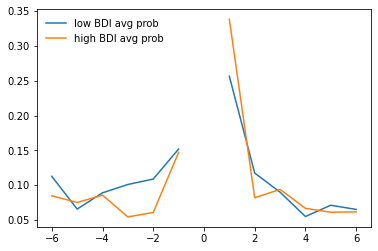

In [60]:
plt.plot('lag', 'low BDI avg prob', data = low_avg)
plt.plot('lag', 'high BDI avg prob', data = high_avg)
plt.legend(loc='upper left',edgecolor="None")

In [62]:
##Same thing but for high and low BAI terciles
low_avg = pd.DataFrame([])
high_avg = pd.DataFrame([])
low_df = lowA_df
high_df = highA_df
for lag in low_df['lag'].unique():
    lavg = np.mean(low_df[low_df['lag']==lag]['prob'])
    havg = np.mean(high_df[high_df['lag']==lag]['prob'])
    low_avg=low_avg.append({
        'lag':lag,
        'low BAI avg prob':lavg
    }, ignore_index=True)
    high_avg=high_avg.append({
        'lag':lag,
        'high BAI avg prob':havg
    }, ignore_index=True)
# plt.plot('lag', 'prob', data = high_df)
low_avg

lag  low BAI avg prob
0  -6.0          0.038302
1  -5.0          0.205159
2  -4.0          0.141562
3  -3.0          0.100685
4  -2.0          0.067769
5  -1.0          0.183979
6   0.0               NaN
7   1.0          0.322850
8   2.0          0.154725
9   3.0          0.076008
10  4.0          0.042403
11  5.0          0.065518
12  6.0          0.052616

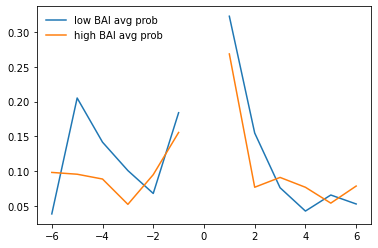

In [63]:
plt.plot('lag', 'low BAI avg prob', data = low_avg)
plt.plot('lag', 'high BAI avg prob', data = high_avg)
plt.legend(loc='upper left',edgecolor="None")